In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib_inline



In [50]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [52]:
print(f"Train Image Size: {train_images.shape}")
print(f"Train label Size: {train_labels.shape}")

print(f"Test Image Size: {test_images.shape}")
print(f"Test label Size: {test_labels.shape}")

Train Image Size: (60000, 28, 28)
Train label Size: (60000,)
Test Image Size: (10000, 28, 28)
Test label Size: (10000,)


### Data Exploration

In [53]:
print(f"Min value: {train_images[0].min()}\nMax Value: {train_images[0].max()}")

Min value: 0
Max Value: 255


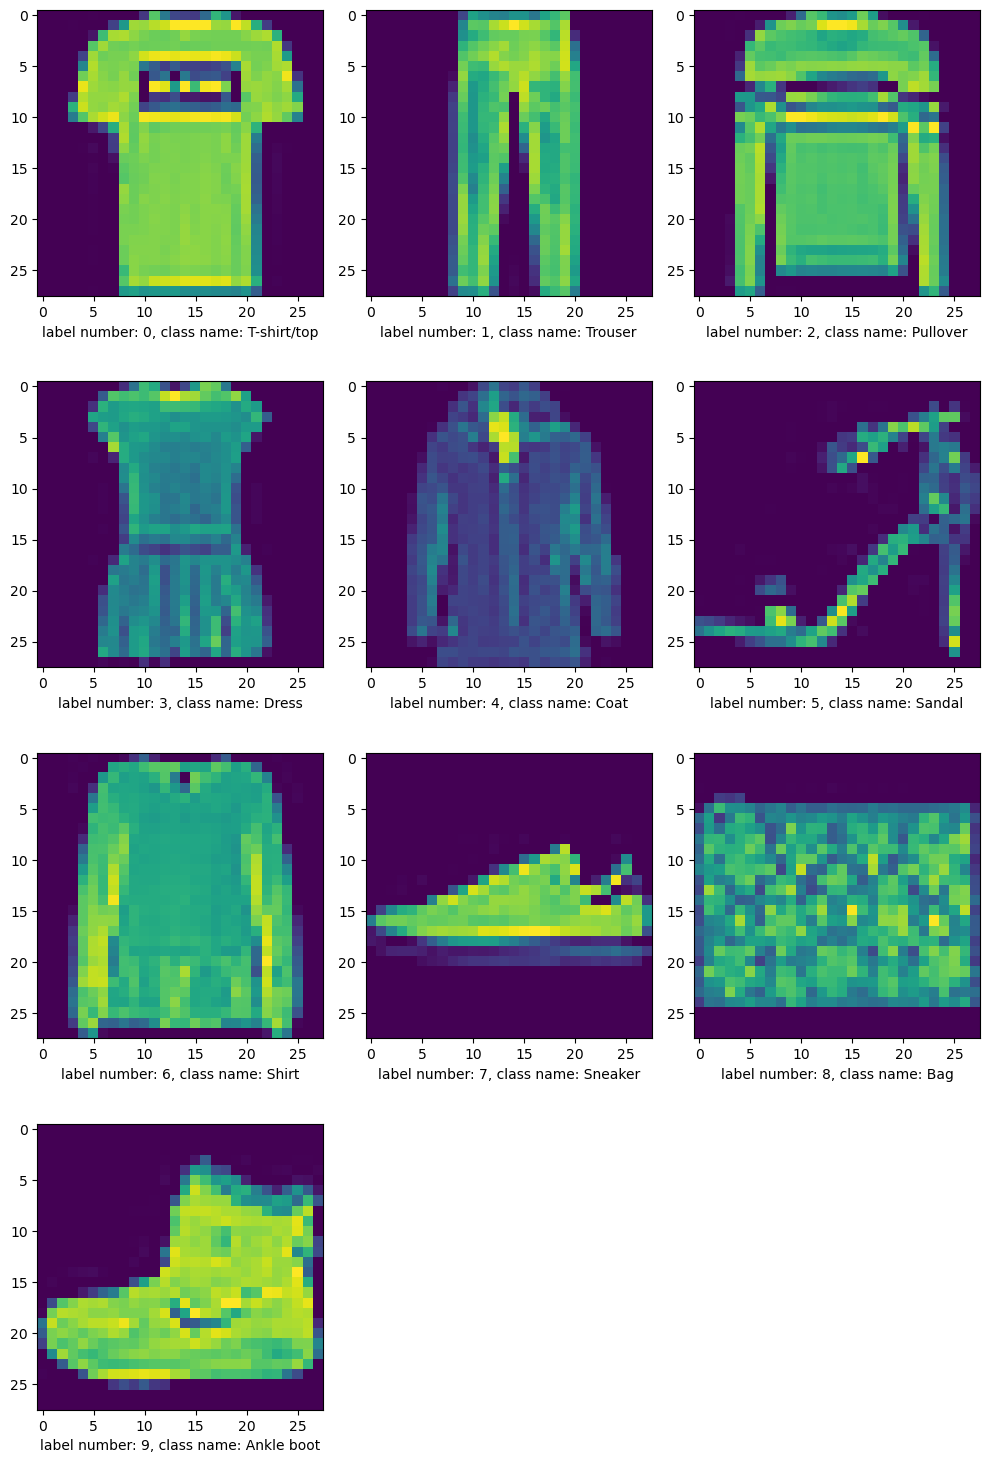

In [54]:
unique_values, indices = np.unique(train_labels, return_index=True)

fig, axs= plt.subplots(4, 3, figsize=(10, 15))
axs= axs.flatten()
for (unique_value, index) in (zip(unique_values, indices)):
    axs[unique_value].imshow(train_images[index])
    axs[unique_value].set_xlabel(f"label number: {unique_value}, class name: {class_names[unique_value]}")
    # print(f"{unique_value}, {class_names[unique_value]}: {index}")

# Leave the last two plots empty
for i in range(10, 12):  # Optional: Remove axes
    axs[i].axis('off')


plt.tight_layout()
plt.show()

In [55]:
#Normalization in the range of [0 - 1]
train_images = train_images / 255.0

test_images = test_images / 255.0

In [56]:
# One hot encoding, 
encoder = OneHotEncoder(sparse_output= False)

train_labels_onehot = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_onehot = encoder.transform(test_labels.reshape(-1, 1))

In [57]:
print(train_labels.reshape(-1, 1).shape)
print(train_labels_onehot.shape)

(60000, 1)
(60000, 10)


In [58]:
gpu_devices = tf.config.list_physical_devices('GPU')

if not gpu_devices:
    print("TensorFlow is using the CPU.")
else:
    print(f"TensorFlow is using the following GPU(s): {gpu_devices}")

TensorFlow is using the following GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model Development:
shallow neural network

In [59]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [77]:
# Method to plot train and validation accuracy and loss over epoches.
def PlotTrainAndValidationAccuracyAndLoss(nn_model_history: tf.keras.callbacks.History, model_name: str):
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    sns.lineplot(x=np.array(nn_model_history.epoch) + 1, y= nn_model_history.history['accuracy'], label='Train', ax = axs[0])
    sns.lineplot(x=np.array(nn_model_history.epoch) + 1, y= nn_model_history.history['val_accuracy'], label='Validation', ax = axs[0])
    axs[0].set_title(f'{model_name} accuracy')
    axs[0].set_ylabel('accuracy')
    # axs[0].set_xticks(range(1, len(nn_model_history.epoch) + 1))
    axs[0].set_xlabel('epoch')
    axs[0].legend(loc='upper left')

    sns.lineplot(x=np.array(nn_model_history.epoch) + 1, y= nn_model_history.history['loss'], label='Train', ax = axs[1])
    sns.lineplot(x=np.array(nn_model_history.epoch) + 1, y= nn_model_history.history['val_loss'], label='Validation', ax = axs[1])
    axs[1].set_title(f'{model_name} loss')
    axs[1].set_ylabel('loss')
    # axs[1].set_xticks(range(1, len(nn_model_history.epoch) + 1))
    axs[1].set_xlabel('epoch')
    axs[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [61]:
#Shallow Neural Network Model 1
shallow_nn_model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
shallow_nn_model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

shallow_nn1_history = shallow_nn_model1.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 32)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7689 - loss: 0.6566 - val_accuracy: 0.8499 - val_loss: 0.4282
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8577 - loss: 0.3967 - val_accuracy: 0.8595 - val_loss: 0.3927
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8735 - loss: 0.3517 - val_accuracy: 0.8644 - val_loss: 0.3737
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8814 - loss: 0.3237 - val_accuracy: 0.8720 - val_loss: 0.3592
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8906 - loss: 0.3018 - val_accuracy: 0.8742 - val_loss: 0.3494
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8955 - loss: 0.2850 - val_accuracy: 0.8764 - val_loss: 0.3488
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9023 - loss: 0.2686 - val_accuracy: 0.8810 - val_loss: 0.3345
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9063 - loss: 0

In [62]:
#Shallow Neural Network Model 1
shallow_nn_model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])
shallow_nn_model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

shallow_nn2_history = shallow_nn_model2.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 32)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7798 - loss: 0.6238 - val_accuracy: 0.8536 - val_loss: 0.4073
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8630 - loss: 0.3831 - val_accuracy: 0.8615 - val_loss: 0.3799
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8784 - loss: 0.3384 - val_accuracy: 0.8690 - val_loss: 0.3615
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8870 - loss: 0.3102 - val_accuracy: 0.8715 - val_loss: 0.3577
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8940 - loss: 0.2888 - val_accuracy: 0.8726 - val_loss: 0.3549
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9015 - loss: 0.2717 - val_accuracy: 0.8713 - val_loss: 0.3592
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9066 - loss: 0.2569 - val_accuracy: 0.8724 - val_loss: 0.3685
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9115 - loss: 0

In [64]:
#Shallow Neural Network Model 1
shallow_nn_model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])
shallow_nn_model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

shallow_nn3_history = shallow_nn_model3.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 32)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6769 - loss: 1.0525 - val_accuracy: 0.8126 - val_loss: 0.5687
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8186 - loss: 0.5449 - val_accuracy: 0.8299 - val_loss: 0.5005
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8354 - loss: 0.4854 - val_accuracy: 0.8390 - val_loss: 0.4694
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8455 - loss: 0.4551 - val_accuracy: 0.8445 - val_loss: 0.4499
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8504 - loss: 0.4348 - val_accuracy: 0.8482 - val_loss: 0.4362
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8560 - loss: 0.4195 - val_accuracy: 0.8525 - val_loss: 0.4253
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8597 - loss: 0.4069 - val_accuracy: 0.8563 - val_loss: 0.4163
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8633 - loss: 0

Plot of accuracy and loss of the training set should be done before evaluation of model on test sets else store history in variable and reuse in future,

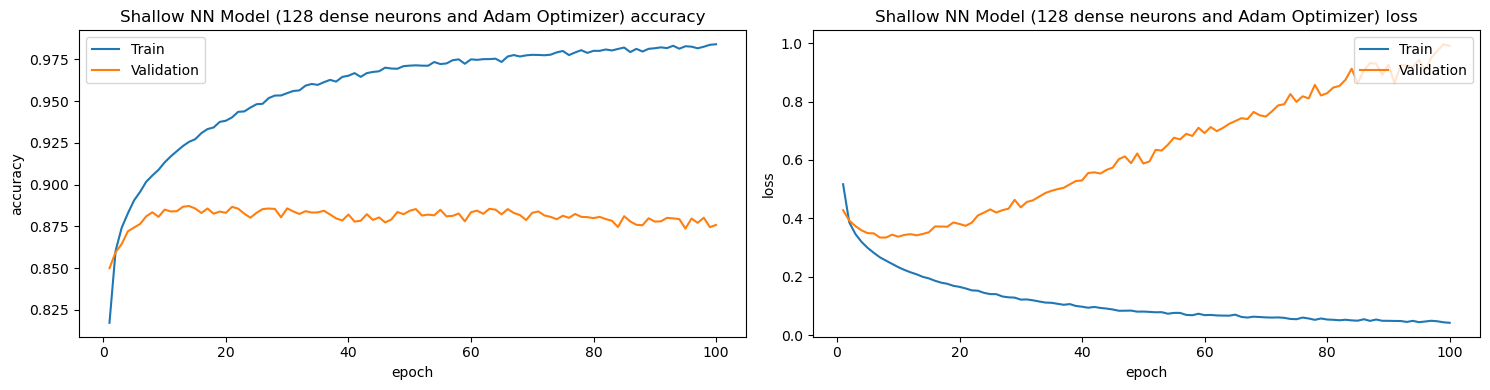

In [78]:
PlotTrainAndValidationAccuracyAndLoss(shallow_nn1_history, "Shallow NN Model (128 dense neurons and Adam Optimizer)")

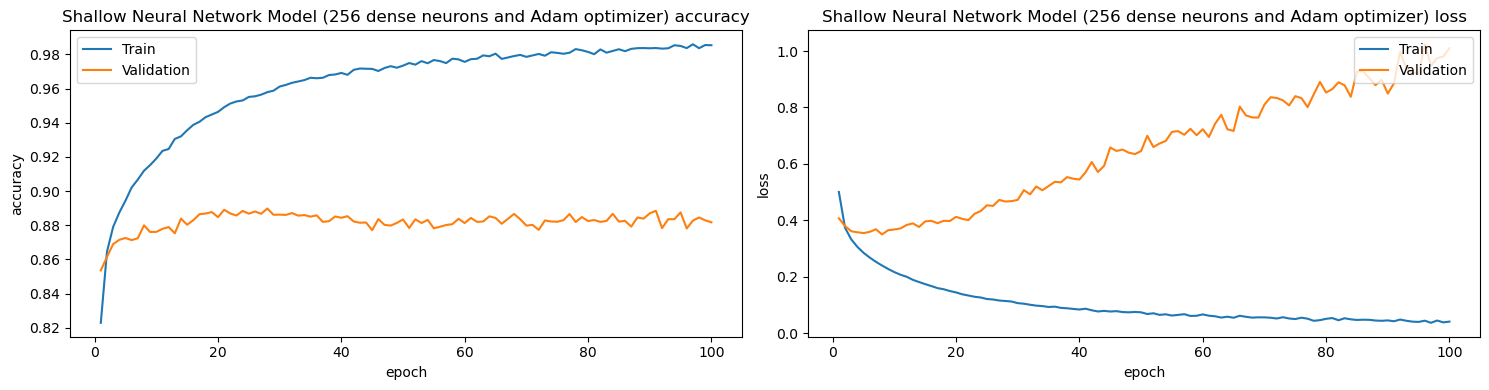

In [79]:
PlotTrainAndValidationAccuracyAndLoss(shallow_nn2_history, "Shallow Neural Network Model (256 dense neurons and Adam optimizer)")

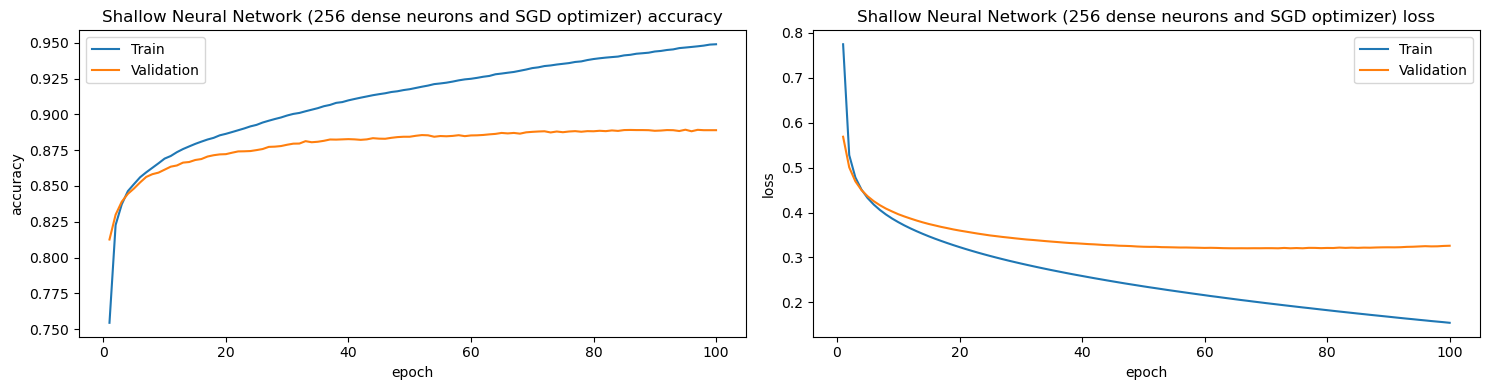

In [80]:
PlotTrainAndValidationAccuracyAndLoss(shallow_nn3_history, "Shallow Neural Network (256 dense neurons and SGD optimizer)")

In [81]:
snn_test_loss, snn_test_acc = shallow_nn_model3.evaluate(test_images,  test_labels_onehot, verbose=2)

print('\nTest accuracy:', snn_test_acc)
snn_test_loss

313/313 - 2s - 6ms/step - accuracy: 0.8823 - loss: 0.3487

Test accuracy: 0.8823000192642212


0.3487326204776764

In [82]:
snn_probability_model = tf.keras.Sequential([shallow_nn_model3, tf.keras.layers.Softmax()])

In [83]:
snn_prediction_result_softmax= snn_probability_model.predict(test_images,batch_size= 32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [84]:
snn_prediction_result_softmax[1]

array([1.44779403e-06, 2.03730800e-11, 9.99366343e-01, 1.78835641e-10,
       6.10412622e-04, 3.67351737e-17, 2.18277801e-05, 3.13615193e-16,
       8.83218565e-09, 1.32868475e-17], dtype=float32)

In [85]:
snn_test_label_pred = np.argmax(snn_prediction_result_softmax, axis=1)  # Predicted labels

print(snn_test_label_pred[:10])
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [86]:
# Print a classification report for shallow neural network classification model
classification_report_snn = (classification_report(test_labels, snn_test_label_pred))
print(classification_report_snn)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.84      0.81      1000
           3       0.88      0.88      0.88      1000
           4       0.85      0.79      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.66      0.76      0.71      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



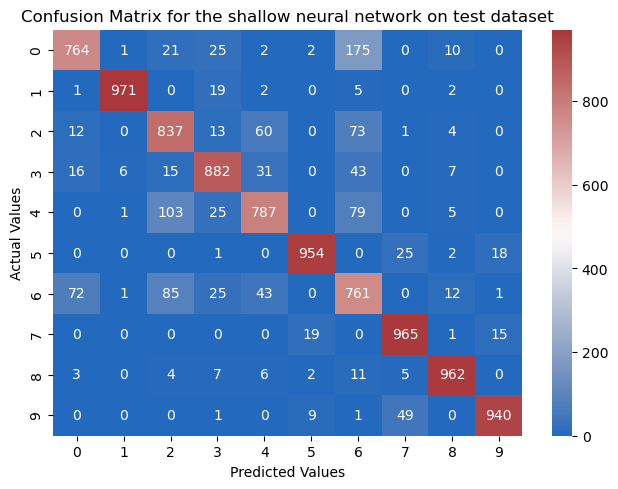

In [87]:
# Print a confusion matrix for shallow neural network on test dataset

confusion_matrix_snn= (confusion_matrix(test_labels, snn_test_label_pred))

sns.heatmap(data= confusion_matrix_snn,fmt='g', annot= True, cmap= "vlag")
plt.title("Confusion Matrix for the shallow neural network on test dataset")
plt.tight_layout()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

basic convolutional neural network (CNN)

In [89]:
simple_cnn_model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters= 32, kernel_size= (3, 3), activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 128, activation= "relu"),
    tf.keras.layers.Dense(10)
])

simple_cnn_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

simple_cnn1_history = simple_cnn_model1.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 32)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8188 - loss: 0.5288 - val_accuracy: 0.8618 - val_loss: 0.4108
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8823 - loss: 0.3224 - val_accuracy: 0.8702 - val_loss: 0.3649
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8992 - loss: 0.2764 - val_accuracy: 0.8772 - val_loss: 0.3903
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9091 - loss: 0.2481 - val_accuracy: 0.8793 - val_loss: 0.3730
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9154 - loss: 0.2303 - val_accuracy: 0.8804 - val_loss: 0.4110
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9231 - loss: 0.2045 - val_accuracy: 0.8716 - val_loss: 0.4812
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9282 - loss: 0.1961 - val_accuracy: 0.8798 - val_loss: 0.4830
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9337 - loss: 

In [90]:
simple_cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters= 64, kernel_size= (3, 3), activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= (3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 256, activation= "relu"),
    tf.keras.layers.Dense(10)
])

simple_cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

simple_cnn2_history = simple_cnn_model2.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 64)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7812 - loss: 0.6143 - val_accuracy: 0.8823 - val_loss: 0.3344
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8840 - loss: 0.3271 - val_accuracy: 0.8940 - val_loss: 0.2947
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9000 - loss: 0.2776 - val_accuracy: 0.9002 - val_loss: 0.2772
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9106 - loss: 0.2440 - val_accuracy: 0.9024 - val_loss: 0.2721
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9198 - loss: 0.2160 - val_accuracy: 0.9044 - val_loss: 0.2680
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9292 - loss: 0.1912 - val_accuracy: 0.9059 - val_loss: 0.2690
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9388 - loss: 0.1692 - val_accuracy: 0.9072 - val_loss: 0.2717
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9471 - loss: 0.1488 - val_accu

In [91]:
simple_cnn_model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters= 32, kernel_size= (3, 3), activation= "relu"),
    tf.keras.layers.MaxPool2D(pool_size= (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 256, activation= "tanh"),
    tf.keras.layers.Dense(10)
])

simple_cnn_model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

simple_cnn3_history = simple_cnn_model3.fit(train_images, train_labels_onehot, epochs=100, validation_split= 0.2, batch_size= 64)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5807 - loss: 1.4136 - val_accuracy: 0.7801 - val_loss: 0.6417
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7885 - loss: 0.6186 - val_accuracy: 0.8083 - val_loss: 0.5463
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8097 - loss: 0.5370 - val_accuracy: 0.8199 - val_loss: 0.5083
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8210 - loss: 0.4997 - val_accuracy: 0.8278 - val_loss: 0.4852
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8304 - loss: 0.4753 - val_accuracy: 0.8338 - val_loss: 0.4683
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8381 - loss: 0.4571 - val_accuracy: 0.8386 - val_loss: 0.4548
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8443 - loss: 0.4423 - val_accuracy: 0.8429 - val_loss: 0.4434
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8501 - loss: 0.4298 - val_accu

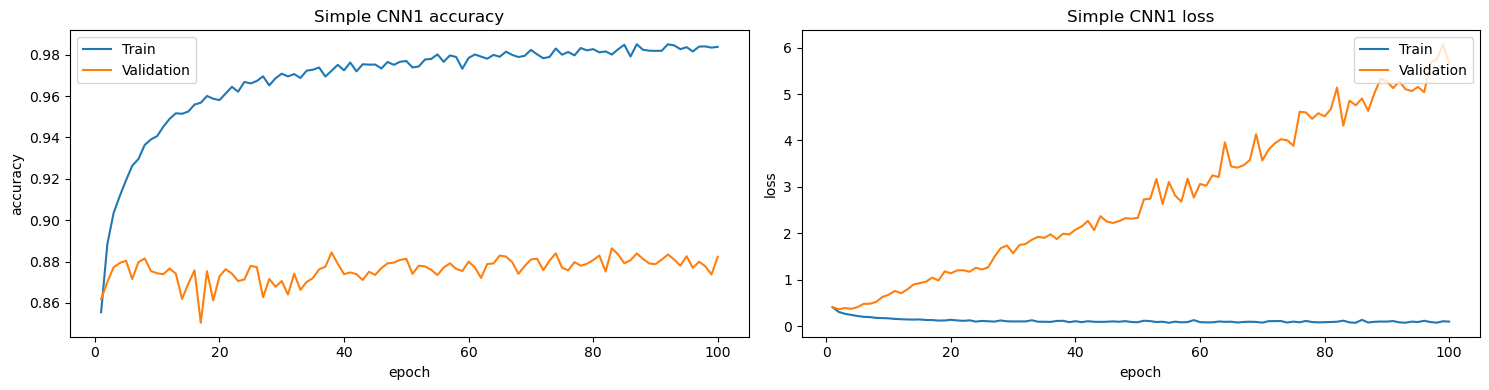

In [92]:
PlotTrainAndValidationAccuracyAndLoss(simple_cnn1_history, "Simple CNN1")

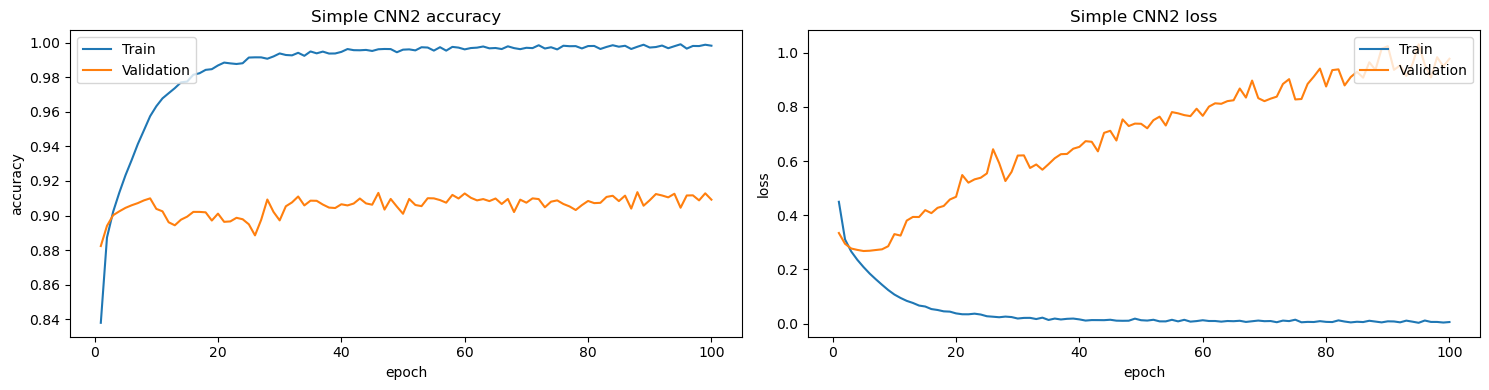

In [93]:
PlotTrainAndValidationAccuracyAndLoss(simple_cnn2_history, "Simple CNN2")

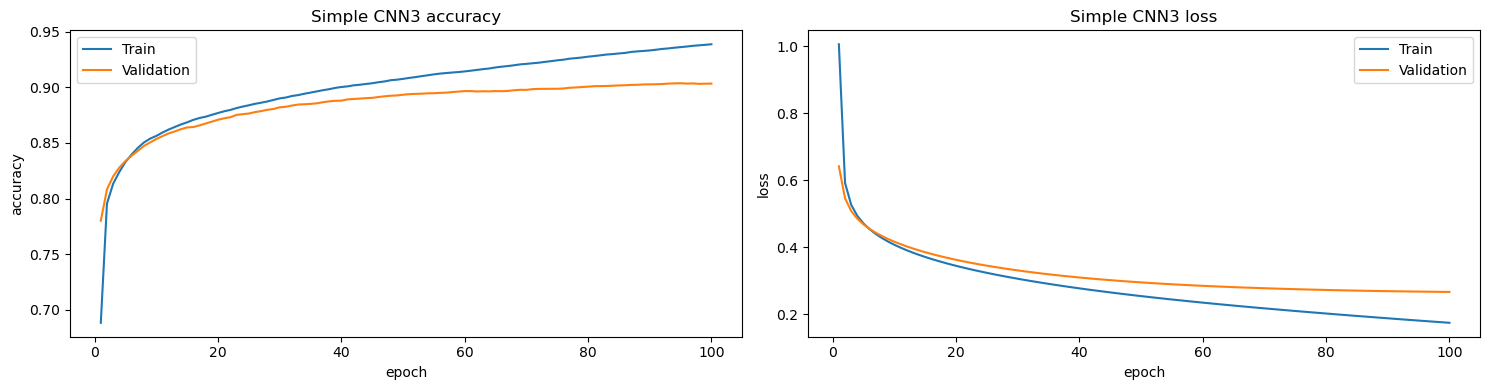

In [95]:
PlotTrainAndValidationAccuracyAndLoss(simple_cnn3_history, "Simple CNN3")